In [1]:
import tweepy
import json
import pandas as pd
from perspective import PerspectiveAPI
from googleapiclient import discovery
import numpy as np
import re
import time
import sys
path_utils = 'C:/Users/gianl/Desktop/Gi/Supsi/Vaccines_Discussion_Italy/tweet_utils'
sys.path.append(path_utils)
import utils
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings("ignore")
path_files ="C:/Users/gianl/Desktop/Gi/Supsi/Vaccines_Discussion_Italy/Italian/Files/"
path_data = "C:/Users/gianl/Desktop/Gi/Supsi/Vaccines_Discussion_Italy/Italian/Files/Tweets/"

In [2]:
jsonFile = open(path_files + 'auth.json', 'r')
config = json.load(jsonFile)
jsonFile.close()
API_KEY = config["api_key_1"]

# Clean text and write

In [6]:
strng = "@Cristiano è il nostro #MVP? si: https://google.com"

In [41]:
def clean(x: str):
    if ("http" in x):
        x = re.sub(r'http\S+', '',x)
    x = re.sub('[@#$]', '', x)
    x = re.sub('\n', ' ', x)
    return x

In [8]:
clean(strng)

'Cristiano è il nostro MVP? si: '

In [3]:
df_bad = pd.read_csv(path_data + "bad_activities.csv")
df_good = pd.read_csv(path_data + "good_activities.csv")
df_suspended = pd.read_parquet(path_data + "tweets_bad_suspended.parquet", engine="fastparquet")
df_suspended_good= pd.read_parquet(path_data + "tweets_good_suspended.parquet", engine="fastparquet")
tweets = pd.read_parquet(path_data + "tweets.parquet", engine="fastparquet")

In [40]:
# tweets.head()

In [92]:
# x = list(tweets["text"])
# y = list(tweets["id"])
# count = 0
lst_id = []
lst_text = []
for i in tqdm(range(len(x))):
    lst_id.append(y[i])
    lst_text.append(clean(x[i]))
pd.DataFrame(list(zip(lst_id,lst_text)),columns=["id","text"]).to_csv("C:/Users/gianl/Desktop/Gi/Supsi/Vaccines_Discussion_Italy/Laura/texts/df_cleaned.csv",
                                                                     line_terminator="\n", encoding="utf-8", index=False)

In [2]:
esempio = pd.read_csv("C:/Users/gianl/Desktop/Gi/Supsi/Vaccines_Discussion_Italy/Laura/texts/df_cleaned.csv",
                              lineterminator="\n", low_memory=False, encoding="utf-8")

In [9]:
lst_final = []
x2 = list(set(esempio["text"]))
for i in tqdm(x2[1:]):
    if len(i.split(" ")) >= 4:
        lst_final.append(i)

In [23]:
n = 11
splited = [lst_final[i::n] for i in range(n)]


In [25]:
count = 0
for i in splited:
    pd.DataFrame(i, columns=["text"]).to_csv(f"C:/Users/gianl/Desktop/Gi/Supsi/Vaccines_Discussion_Italy/Laura/texts/example_{count}.csv",
                           line_terminator="\n", index=False, encoding="utf-8")
    count = count + 1


In [12]:

# esempio = pd.read_csv("C:/Users/gianl/Desktop/Gi/Supsi/Vaccines_Discussion_Italy/Laura/texts/example.csv",
#                               lineterminator="\n", low_memory=False, encoding="utf-8")
# esempio

In [87]:
# print(len(x2))
# count = 0
# for i in x2:
#     if len(i.split(" ")) < 4:
#         count = count + 1
#         print(i)
# print(count)
# 1499124 - 69376
# 1500000 / 50000

# Classification

In [3]:
# p = PerspectiveAPI(api_key=API_KEY)
# results = []
# for i in tqdm(texts):
#     time.sleep(1)
#     try:
#         result = p.score(i)
#         results.append(result["TOXICITY"])
#     except Exception as e:
#         print("Error: ", e)

In [70]:
print(f"Primi 1000 tweet Good {0.03} Toxicity score")
print(f"Primi 1000 tweet Good susp {0.10} Toxicity score")
print(f"Primi 1000 tweet Bad susp {0.12} Toxicity score")
print(f"Primi 1000 tweet Bad {0.09} Toxicity score")

Primi 1000 tweet Good 0.03 Toxicity score
Primi 1000 tweet Good susp 0.1 Toxicity score
Primi 1000 tweet Bad susp 0.12 Toxicity score
Primi 1000 tweet Bad 0.09 Toxicity score


In [2]:
# client = discovery.build(
#   "commentanalyzer",
#   "v1alpha1",
#   developerKey=API_KEY,
#   discoveryServiceUrl="https://commentanalyzer.googleapis.com/$discovery/rest?version=v1alpha1",
#   static_discovery=False,
# )

# analyze_request = {
#   'comment': { 'text': "guarda, sei bravo!"},
#   'requestedAttributes': {'TOXICITY': {}}
# }

# response = client.comments().analyze(body=analyze_request).execute()
# print(json.dumps(response, indent=2))

# Ricomposizione DF

In [21]:
esempio = pd.read_csv("C:/Users/gianl/Desktop/Gi/Supsi/Vaccines_Discussion_Italy/Italian/script_directory_output/df_cleaned.csv",
                              lineterminator="\n", low_memory=False, encoding="utf-8")

In [3]:
esempio.head()

,id,text
0,1221739084449832960,La Memoria è l’unico vaccino contro l’indiffer...
1,1221737155380293640,"Oggi sono arrivati loro, 3 femminucce e 1 masc..."
2,1221730009989120001,L'indifferenza è più colpevole della violenza ...
3,1221737654909382662,"Minaccia morbillo nel Salento, Asl: ""Vaccinars..."
4,1221728980203724801,"""Coltivare la Memoria è ancora oggi un vaccino..."


In [18]:
tweets = pd.read_parquet(path_data + "tweets.parquet", engine="fastparquet")[["id","user_screen_name","created_at"]]

In [19]:
tweets.head()

,id,user_screen_name,created_at
0,1221739084449832960,planetpaul65,Mon Jan 27 10:17:51 +0000 2020
1,1221737155380293640,Grace_1207,Mon Jan 27 10:10:11 +0000 2020
2,1221730009989120001,MarisaMinervini,Mon Jan 27 09:41:47 +0000 2020
3,1221737654909382662,LecceSette,Mon Jan 27 10:12:10 +0000 2020
4,1221728980203724801,arual812,Mon Jan 27 09:37:42 +0000 2020


In [22]:
df = esempio.merge(tweets, on="id", how="left")
df.head()

,id,text,user_screen_name,created_at
0,1221739084449832960,La Memoria è l’unico vaccino contro l’indiffer...,planetpaul65,Mon Jan 27 10:17:51 +0000 2020
1,1221737155380293640,"Oggi sono arrivati loro, 3 femminucce e 1 masc...",Grace_1207,Mon Jan 27 10:10:11 +0000 2020
2,1221730009989120001,L'indifferenza è più colpevole della violenza ...,MarisaMinervini,Mon Jan 27 09:41:47 +0000 2020
3,1221737654909382662,"Minaccia morbillo nel Salento, Asl: ""Vaccinars...",LecceSette,Mon Jan 27 10:12:10 +0000 2020
4,1221728980203724801,"""Coltivare la Memoria è ancora oggi un vaccino...",arual812,Mon Jan 27 09:37:42 +0000 2020


In [23]:
del tweets
del esempio

In [24]:
import warnings
warnings.simplefilter("ignore")
from glob import glob
files = glob(r"C:\Users\gianl\Desktop\Gi\Supsi\Vaccines_Discussion_Italy\Italian\script_directory_output\res*.csv")
results = pd.DataFrame()
for file in files:
    df_temp = pd.read_csv(file, lineterminator="\n", encoding="utf-8", low_memory=False)
    results = results.append(df_temp)
print(len(results))
results.head()

1376011


,text,toxicity
0,andrea__059 LucioMM1 Rey_k73 MMmarco0 Ma da qu...,0.122449
1,La_manina__ PaoloMarani3 Hai cannato. 1743 so...,0.213626
2,noitre32 Ormai viviamo in mezzo a una follia d...,0.271282
3,"Lotta alla pandemia, Bayer e Curevac insieme p...",0.003002
4,EugenioGiani In molto 60 enni nn si prenotano ...,0.037538


In [25]:
res = results.merge(df, on="text", how="left")
res.head()

,text,toxicity,id,user_screen_name,created_at
0,andrea__059 LucioMM1 Rey_k73 MMmarco0 Ma da qu...,0.122449,1379199315483189254,L_impenitente,Mon Apr 05 22:28:35 +0000 2021
1,La_manina__ PaoloMarani3 Hai cannato. 1743 so...,0.213626,1371145963939770377,anninavigneto,Sun Mar 14 17:07:27 +0000 2021
2,noitre32 Ormai viviamo in mezzo a una follia d...,0.271282,1389702220275494915,Roberto53402737,Tue May 04 22:03:23 +0000 2021
3,"Lotta alla pandemia, Bayer e Curevac insieme p...",0.003002,1347175082515439617,tvbusiness24,Thu Jan 07 13:35:43 +0000 2021
4,EugenioGiani In molto 60 enni nn si prenotano ...,0.037538,1393208983717023745,mcsm878,Fri May 14 14:18:00 +0000 2021


In [66]:
print(len(res))
res["date"] = [utils.process_datetime(i) for i in tqdm(res["created_at"])]
np.mean(res["toxicity"])

3548402


0.10749875744084882

Text(0, 0.5, 'Toxicity score')

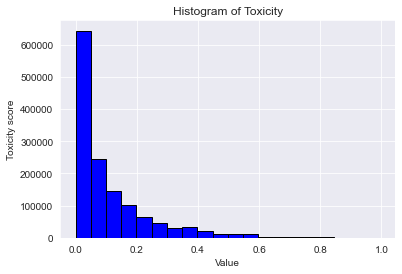

In [27]:
# Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib histogram
plt.hist(results['toxicity'], color = 'blue', edgecolor = 'black', bins=20)

# Add labels
plt.title('Histogram of Toxicity')
plt.xlabel('Value')
plt.ylabel('Toxicity score')

In [28]:
# np.mean(res[res["user_screen_name"]=="ItalianoeRomano"]["toxicity"])

In [29]:
toxic = res[res["toxicity"]>0.5]

In [30]:
pd.Series(toxic["user_screen_name"]).value_counts().sort_values(ascending=False)[:20]

Piero42395724      187
trincherov         184
il_brigante07      136
Attyla91461568     116
xenonian1          116
Graziel65255465    114
GiovannaSandr16    107
Sakurauchi_Hime    103
ManuQ24916888       85
gaiagioiared        81
LPincia             78
anto_galli4         77
enzo6619            76
ItalianoeRomano     74
manu_etoile         73
Pietro_Otto         73
IAlianna_           72
PazuDaemon          71
tiber_h             69
jobwithinternet     68
Name: user_screen_name, dtype: int64

In [67]:
res['dates']= res[["toxicity","date"]].groupby('date').transform('mean')
res_for_plot = res.drop_duplicates(subset='date')

In [68]:
res_for_plot

,text,toxicity,id,user_screen_name,created_at,date,dates
0,andrea__059 LucioMM1 Rey_k73 MMmarco0 Ma da qu...,0.122449,1379199315483189254,L_impenitente,Mon Apr 05 22:28:35 +0000 2021,2021-04-05,0.106349
1,La_manina__ PaoloMarani3 Hai cannato. 1743 so...,0.213626,1371145963939770377,anninavigneto,Sun Mar 14 17:07:27 +0000 2021,2021-03-14,0.103510
2,noitre32 Ormai viviamo in mezzo a una follia d...,0.271282,1389702220275494915,Roberto53402737,Tue May 04 22:03:23 +0000 2021,2021-05-04,0.100112
3,"Lotta alla pandemia, Bayer e Curevac insieme p...",0.003002,1347175082515439617,tvbusiness24,Thu Jan 07 13:35:43 +0000 2021,2021-01-07,0.084732
4,EugenioGiani In molto 60 enni nn si prenotano ...,0.037538,1393208983717023745,mcsm878,Fri May 14 14:18:00 +0000 2021,2021-05-14,0.089086
...,...,...,...,...,...,...,...
55931,"jeerk_ E non preoccuparti per i soldi, fai ben...",0.160934,1214319449790189572,paraincubi,Mon Jan 06 22:54:52 +0000 2020,2020-01-06,0.119145
56745,VACCINI. Dove c'e' rischio SI IMPONE la libert...,0.047495,1216627232438915073,MarceloTanomix,Mon Jan 13 07:45:10 +0000 2020,2020-01-13,0.120136
66315,"carmelodipaola Non sono un virologo, ma non oc...",0.047495,1307851799513137152,Roby29880142,Mon Sep 21 01:19:02 +0000 2020,2020-09-21,0.097774
346678,"Vaccini, il sistema diventa regionale. Asl Tor...",0.033589,1220547911026561024,venti4ore,Fri Jan 24 03:24:33 +0000 2020,2020-01-24,0.087418


In [24]:
# tweets = pd.read_parquet(path_data + "tweets.parquet", engine="fastparquet")
# lst_users_rt_bad = ["Piero42395724","xenonian1","manu_etoile","paolasoriani53"]

In [25]:
# suspended_user_df = tweets[tweets["user_screen_name"]=="ItalianoeRomano"]
# rt_bad_df = tweets[tweets["user_screen_name"].isin(lst_users_rt_bad)]
# del tweets

In [31]:
# rt_bad_df

In [32]:
# suspended_user_df

In [33]:
# lst_dates = []
# for i in rt_bad_df["created_at"]:
#     lst_dates.append(utils.process_datetime(i))
# rt_bad_df["dates"]=lst_dates
# rt_bad_df['date_tweets']= rt_bad_df.groupby(['dates'])['created_at'].transform('size')
# rt_bad_df = rt_bad_df.drop_duplicates(subset='dates')

In [36]:
# rt_bad_df_flt = rt_bad_df[rt_bad_df["dates"].str.contains("2021-")]

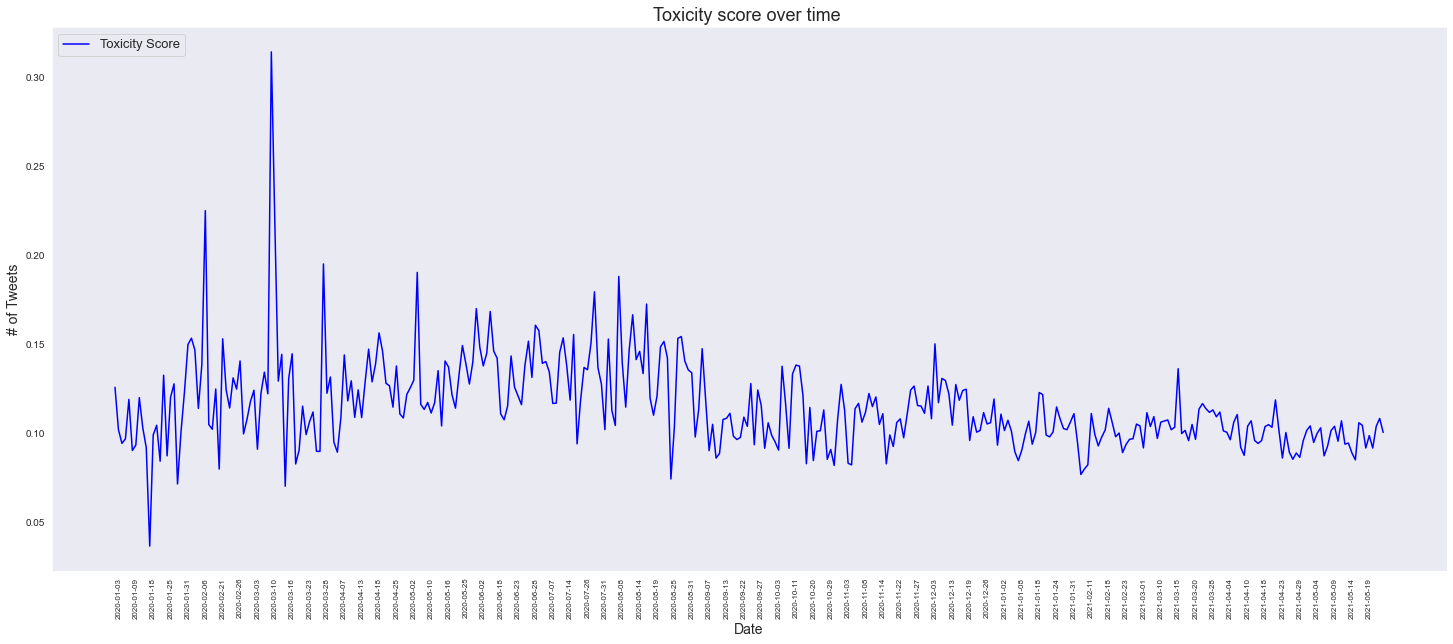

In [72]:
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(25, 10))
plt.title('Toxicity score over time ', fontsize=18)
res_for_plot.sort_values(by=["date"], ascending=True, inplace=True)

ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('# of Tweets', fontsize=14)

plt.plot(res_for_plot['date'], res_for_plot['dates'], c='b', label='Toxicity Score')
# set monthly locator
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
# set formatter
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
# set font and rotation for date tick labels
plt.xticks(rotation='vertical', fontsize = 8)
plt.legend(loc='upper left', fontsize=13);
# plt.axvline(x="2021-03-09")
plt.grid()
plt.show()